In [11]:
import os
os.listdir('./model')

['cats_and_dogs_small_2.h5']

In [14]:
from keras.models import load_model
model = load_model('./model/cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [19]:
os.listdir('./data/cats_vs_dogs_small/test')

['dogs', 'cats']

In [20]:
img_path = './data/cats_vs_dogs_small/test/cats/cat.1700.jpg'

In [21]:
from keras.preprocessing import image
import numpy as np

In [22]:
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor.shape

(150, 150, 3)

In [23]:
img_tensor = np.expand_dims(img_tensor, axis = 0) #3D->4D
img_tensor.shape

(1, 150, 150, 3)

In [24]:
img_tensor/=255.

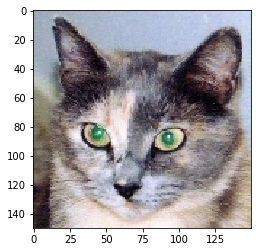

In [26]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [27]:
from keras import models

In [29]:
layer_outputs = [layer.output for layer in model.layers[:8]] #상위 8개 layer만
activation_model = models.Model(inputs = model.input, outputs = layer_outputs) #다중 출력 모델

In [30]:
activations = activation_model.predict(img_tensor)

In [31]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


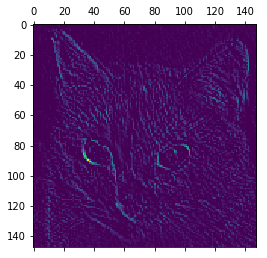

In [32]:
plt.matshow(first_layer_activation[0,:,:,19], cmap = 'viridis') #첫 번째 층 활성화 중에서 20번째 채널

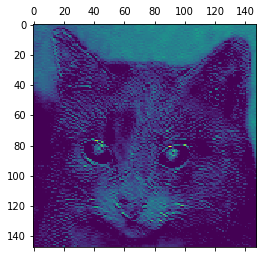

In [33]:
plt.matshow(first_layer_activation[0,:,:,15], cmap = 'viridis')

In [36]:
layer_names = []

for layer in model.layers[:8] :
    layer_names.append(layer.name)
layer_names

['conv2d_13',
 'max_pooling2d_13',
 'conv2d_14',
 'max_pooling2d_14',
 'conv2d_15',
 'max_pooling2d_15',
 'conv2d_16',
 'max_pooling2d_16']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


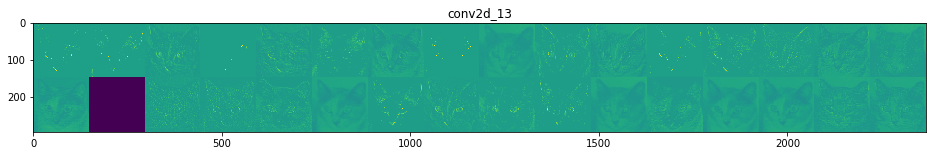

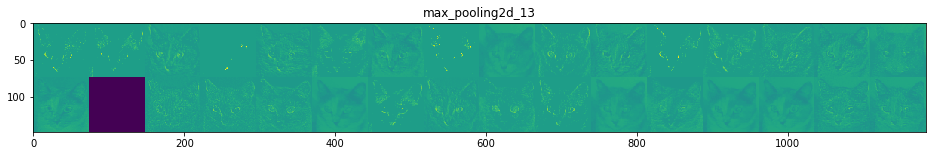

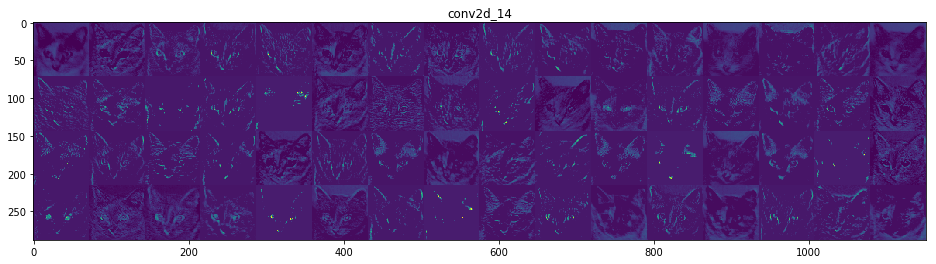

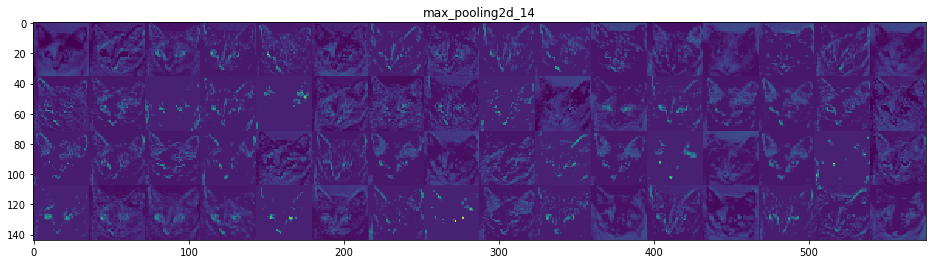

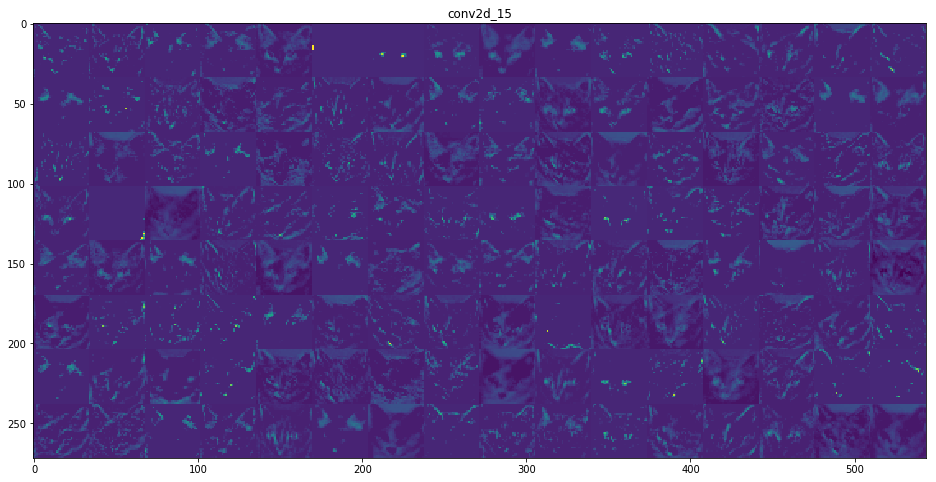

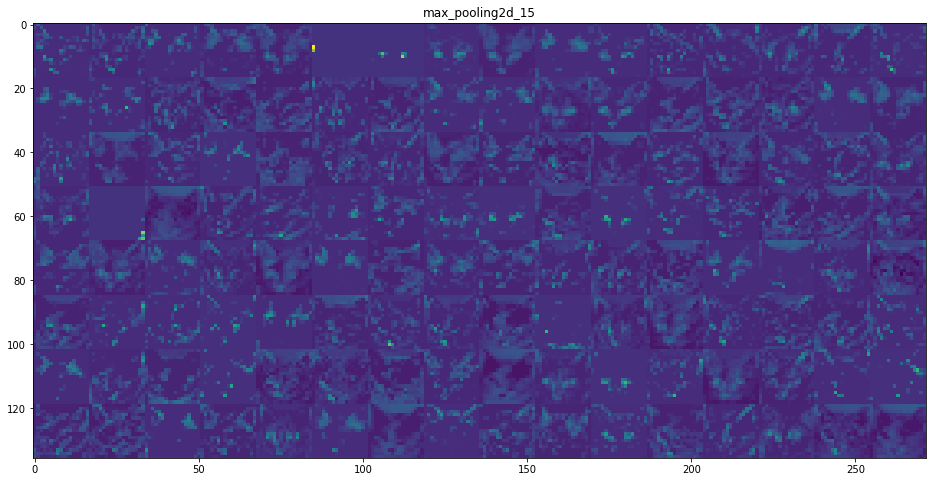

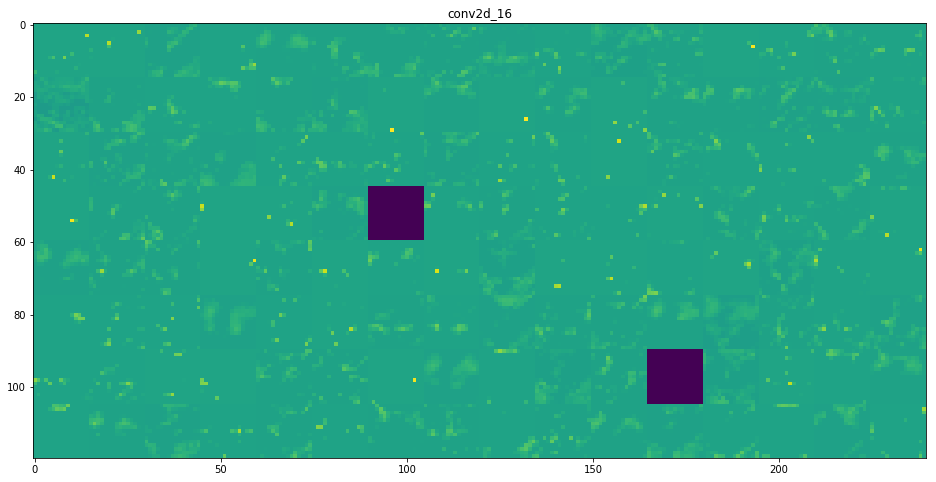

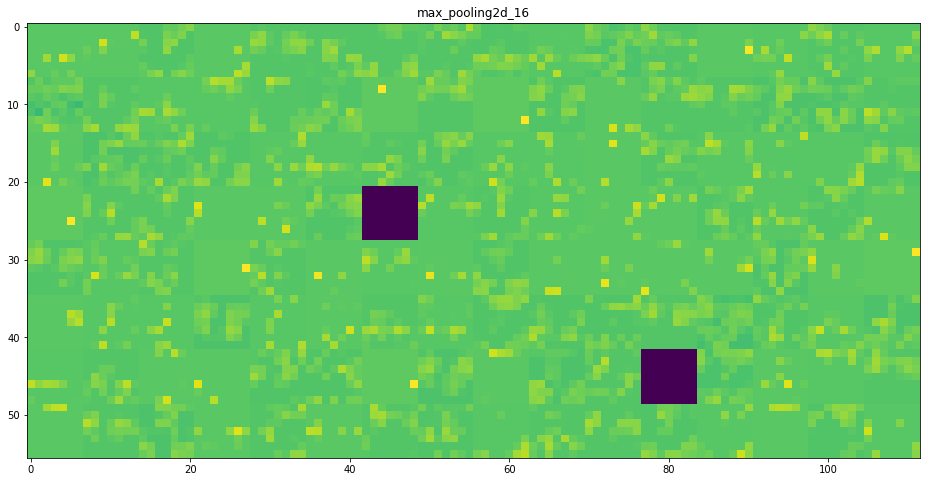

In [37]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations) :
    
    n_features = layer_activation.shape[-1] #the number of features
    size = layer_activation.shape[1] #(1,size,size,n_features)
    
    n_cols = n_features // images_per_row
    displays_gird = np.zeros((size * n_cols, images_per_row*size))
    
    for col in range(n_cols) :
        for row in range(images_per_row) :
            channel_image = layer_activation[0, :,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *=6
            channel_image +=128
            channel_image = np.clip(channel_image, 0,225).astype('uint8')
            
            displays_gird[col * size : (col+1) * size,
                         row * size : (row+1) * size] = channel_image
            
    scale = 1./size

    plt.figure(figsize = (scale * displays_gird.shape[1],
                         scale * displays_gird.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(displays_gird, aspect = 'auto', cmap = 'viridis')
    
    
plt.show()
            

- 첫번째 층은 여러 종류의 에지 감지기. 초기 사진에 있는 거의 모든 정보 유지
- 상위 층으로 갈수록 활성화는 점점 더 추상적
- 고양이 귀, 고양이 눈처럼 고수준 개념을 인코딩
- 이미지의 시각적 콘텐츠에 관한 정보가 점점 줄어들고 이미지의 클래스에 관한 정보가 증가
- 비어 있는 활성화가 층이 깊어짐에 따라 늘어남. 활성화되지 않는 필터들이 생김
- - 마치 눈으로 보았던 것을 똑같이 그려낼 수 없는 것과 마찬가지. 우리 뇌는 시각적 입력에서 관련성이 적은 요소를 필터링하여 고수준 개념으로 변환.